<a href="https://colab.research.google.com/github/LuanaVasconceloss/ValidacaoDadosVentoWRF/blob/main/validacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("/content/validacao_1.CSV.csv")

In [ ]:
df

,DATA_HORA,OBS_10,WRF_ERA5,WRF_DEFAULT,WRF_CONUS
0,05/05/2008 00:00,2.24,3.22,4.13,1.26
1,05/05/2008 01:00,2.30,3.62,3.38,0.38
2,05/05/2008 02:00,2.43,3.76,3.31,0.46
3,05/05/2008 03:00,2.19,3.02,3.19,0.72
4,05/05/2008 04:00,2.57,3.32,3.09,1.01
...,...,...,...,...,...
616,30/05/2008 16:00,4.93,4.24,4.75,2.80
617,30/05/2008 17:00,4.89,5.27,5.50,2.58
618,30/05/2008 18:00,4.94,4.58,5.48,2.27
619,30/05/2008 19:00,4.79,4.38,4.99,2.59


In [ ]:
df['DATA_HORA'] = pd.to_datetime(df['DATA_HORA'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATA_HORA    621 non-null    datetime64[ns]
 1   OBS_10       621 non-null    float64       
 2   WRF_ERA5     621 non-null    float64       
 3   WRF_DEFAULT  621 non-null    float64       
 4   WRF_CONUS    621 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 24.4 KB


In [ ]:
dados_ab = df.set_index("DATA_HORA")

In [ ]:
dados_ab

,OBS_10,WRF_ERA5,WRF_DEFAULT,WRF_CONUS
DATA_HORA,,,,
2008-05-05 00:00:00,2.24,3.22,4.13,1.26
2008-05-05 01:00:00,2.30,3.62,3.38,0.38
2008-05-05 02:00:00,2.43,3.76,3.31,0.46
2008-05-05 03:00:00,2.19,3.02,3.19,0.72
2008-05-05 04:00:00,2.57,3.32,3.09,1.01
...,...,...,...,...
2008-05-30 16:00:00,4.93,4.24,4.75,2.80
2008-05-30 17:00:00,4.89,5.27,5.50,2.58
2008-05-30 18:00:00,4.94,4.58,5.48,2.27


<Axes: xlabel='DATA_HORA'>

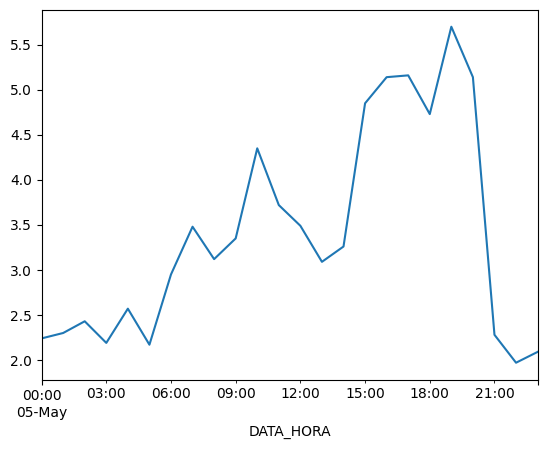

In [ ]:
dados_ab['OBS_10'].iloc[:24].plot()

In [ ]:
obs_h = dados_ab['OBS_10'].groupby(dados_ab.index.hour).mean()
era5_h = dados_ab['WRF_ERA5'].groupby(dados_ab.index.hour).mean()
default_h = dados_ab['WRF_DEFAULT'].groupby(dados_ab.index.hour).mean()
conus_h = dados_ab['WRF_CONUS'].groupby(dados_ab.index.hour).mean()

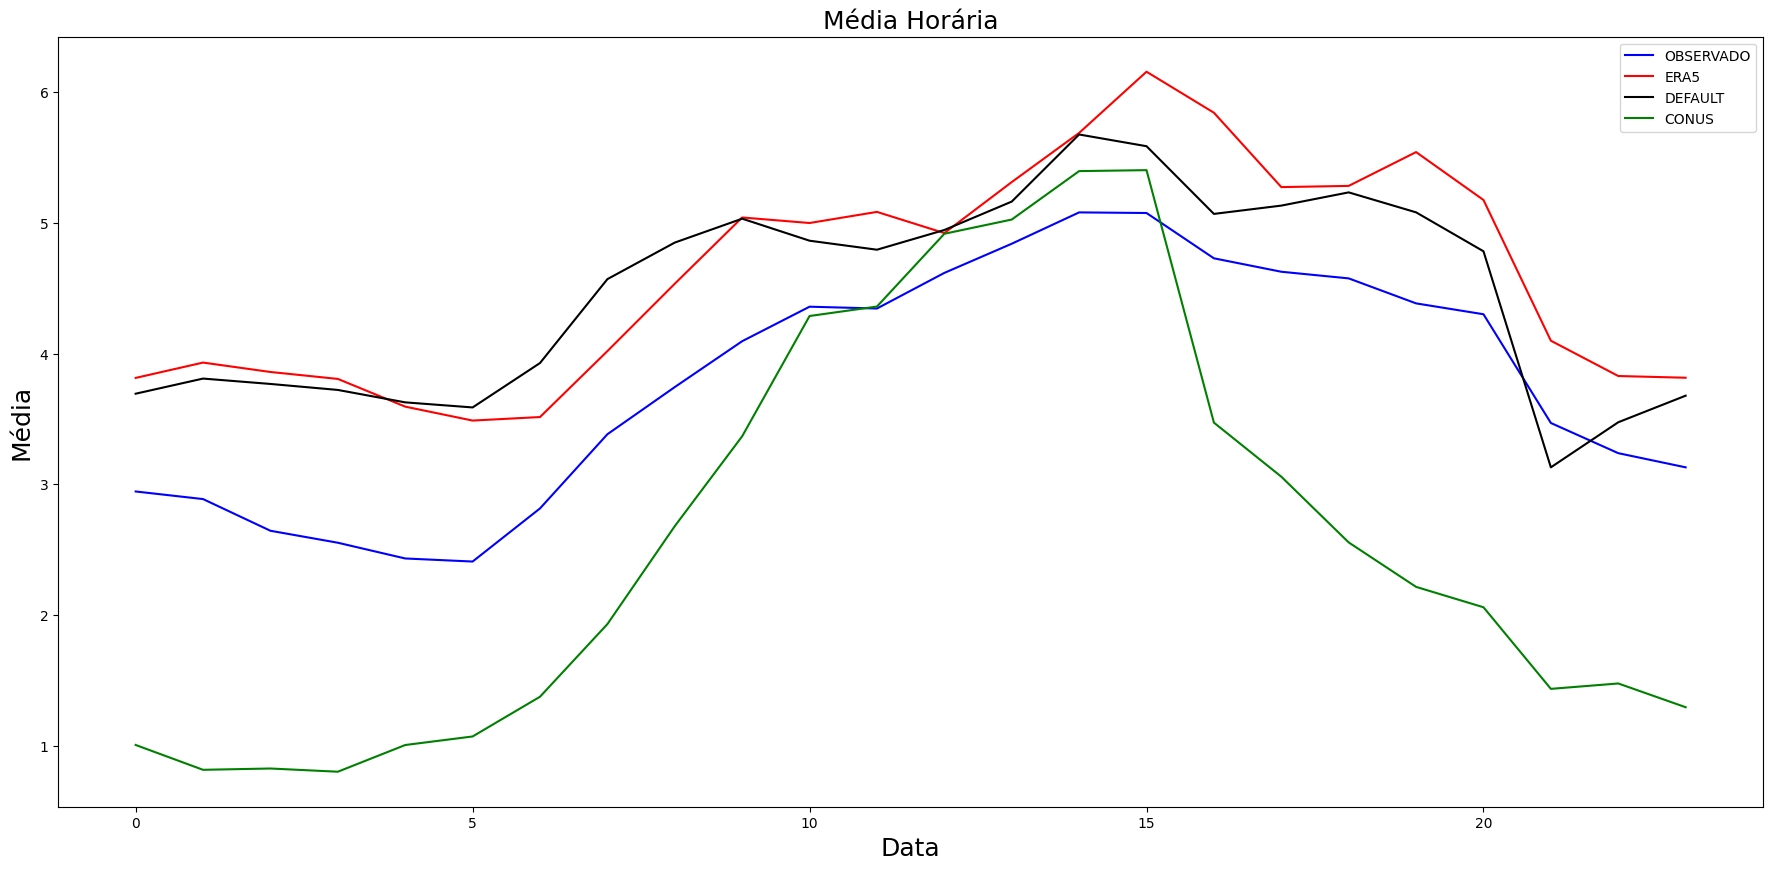

In [ ]:
from ipywidgets.widgets.widget_string import Label
plt.figure(figsize = (22,10))
plt.title('Média Horária', fontsize=18)
plt.plot(obs_h, color = 'blue', label = 'OBSERVADO')
plt.plot(era5_h, color = 'red', label = 'ERA5')
plt.plot(default_h, color = 'black', label = 'DEFAULT')
plt.plot(conus_h, color = 'green', label = 'CONUS')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Média', fontsize=18)
plt.legend()

In [ ]:
obs_h

DATA_HORA
0     2.945000
1     2.886923
2     2.644615
3     2.553077
4     2.432692
5     2.409231
6     2.815385
7     3.382692
8     3.743462
9     4.094231
10    4.358077
11    4.344231
12    4.616538
13    4.839615
14    5.079231
15    5.074615
16    4.728077
17    4.625385
18    4.574615
19    4.383462
20    4.300385
21    3.468800
22    3.238000
23    3.129600
Name: OBS_10, dtype: float64

In [ ]:
df_media_horaria = dados_ab.resample('1H').mean()


In [ ]:
df_media_horaria

,OBS_10,WRF_ERA5,WRF_DEFAULT,WRF_CONUS
DATA_HORA,,,,
2008-05-05 00:00:00,2.24,3.22,4.13,1.26
2008-05-05 01:00:00,2.30,3.62,3.38,0.38
2008-05-05 02:00:00,2.43,3.76,3.31,0.46
2008-05-05 03:00:00,2.19,3.02,3.19,0.72
2008-05-05 04:00:00,2.57,3.32,3.09,1.01
...,...,...,...,...
2008-12-05 19:00:00,3.75,5.47,5.62,1.97
2008-12-05 20:00:00,4.04,5.44,4.20,3.00
2008-12-05 21:00:00,4.02,4.96,3.20,1.80


In [ ]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,OBS_10,WRF_ERA5,WRF_DEFAULT,WRF_CONUS
OBS_10,1.000000,0.675468,0.539192,0.532360
WRF_ERA5,0.675468,1.000000,0.672753,0.519295
WRF_DEFAULT,0.539192,0.672753,1.000000,0.580600
WRF_CONUS,0.532360,0.519295,0.580600,1.000000


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name='OBSERVADO',
    y=dados_ab['OBS_10'].values,
    x=dados_ab['OBS_10'].index,
    line={
        'width': 2,
    }
))

fig.add_trace(go.Scatter(
    name='CONUS',
    y=dados_ab['WRF_CONUS'].values,
    x=dados_ab['WRF_CONUS'].index,
    line={
        'width': 2,
    }
))




fig.add_trace(go.Scatter(
    name='DEFAULT',
    y=dados_ab['WRF_DEFAULT'].values,
    x=dados_ab['WRF_DEFAULT'].index,
    line={
        'width': 2,
    }
))

fig.add_trace(go.Scatter(
    name='ERA5',
    y=dados_ab['WRF_ERA5'].values,
    x=dados_ab['WRF_ERA5'].index,
    line={
        'width': 2,
    }
))

fig.update_xaxes(tickmode='auto', nticks=5)

fig.update_layout(

     title={
        'text': 'validação OBSERVADO X SIMULADOS (ÁGUA BRANCA)',
        'x': 0.5,  # Define a posição horizontal do título (0-1)
        'xanchor': 'center'  # Ancora o título ao centro horizontal
    },
    xaxis_title="Data",
    yaxis_title="VELOCIDADE DO VENTO (m/s)",
    font=dict(
        size=12,
        color="#7f7f7f"
    ),
    plot_bgcolor="white",
)

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name='OBSERVADO',
    y=df['OBS_10'].values,
    x=df['OBS_10'].index,
    line={
        'width': 2,
    }
))

fig.add_trace(go.Scatter(
    name='CONUS',
    y=df['WRF_CONUS'].values,
    x=df['WRF_CONUS'].index,
    line={
        'width': 2,
    }
))




fig.add_trace(go.Scatter(
    name='DEFAULT',
    y=df['WRF_DEFAULT'].values,
    x=df['WRF_DEFAULT'].index,
    line={
        'width': 2,
    }
))

fig.add_trace(go.Scatter(
    name='ERA5',
    y=df['WRF_ERA5'].values,
    x=df['WRF_ERA5'].index,
    line={
        'width': 2,
    }
))

fig.update_xaxes(tickmode='auto', nticks=5)

fig.update_layout(

     title={
        'text': 'validação OBSERVADO X SIMULADOS (ÁGUA BRANCA)',
        'x': 0.5,  # Define a posição horizontal do título (0-1)
        'xanchor': 'center'  # Ancora o título ao centro horizontal
    },
    xaxis_title="Data",
    yaxis_title="VELOCIDADE DO VENTO (m/s)",
    font=dict(
        size=12,
        color="#7f7f7f"
    ),
    plot_bgcolor="white",
)

In [ ]:
df.describe()

,OBS_10,WRF_ERA5,WRF_DEFAULT,WRF_CONUS
count,621.000000,621.000000,621.000000,621.000000
mean,3.780242,4.611852,4.470757,2.582093
std,1.480988,1.599301,1.468834,1.990937
min,0.490000,0.150000,0.460000,0.020000
25%,2.660000,3.510000,3.410000,1.100000
50%,3.540000,4.430000,4.290000,1.850000
75%,4.800000,5.750000,5.500000,3.660000
max,8.110000,8.850000,9.350000,9.330000


from matplotlib import pyplot as plt
_df_0['OBS_10'].plot(kind='hist', bins=20, title='OBS_10')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['WRF_ERA5'].plot(kind='hist', bins=20, title='WRF_ERA5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['WRF_DEFAULT'].plot(kind='hist', bins=20, title='WRF_DEFAULT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['WRF_CONUS'].plot(kind='hist', bins=20, title='WRF_CONUS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='OBS_10', y='WRF_ERA5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='WRF_ERA5', y='WRF_DEFAULT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='WRF_DEFAULT', y='WRF_CONUS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['OBS_10'].plot(kind='line', figsize=(8, 4), title='OBS_10')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['WRF_ERA5'].plot(kind='line', figsize=(8, 4), title='WRF_ERA5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['WRF_DEFAULT'].plot(kind='line', figsize=(8, 4), title='WRF_DEFAULT')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['WRF_CONUS'].plot(kind='line', figsize=(8, 4), title='WRF_CONUS')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(df['OBS_10'], df['WRF_CONUS'])

4.448471336553944

In [ ]:
mean_squared_error(df['OBS_10'], df['WRF_DEFAULT'])

2.4785463768115945

In [ ]:
mean_squared_error(df['OBS_10'], df['WRF_ERA5'])

2.2404146537842187

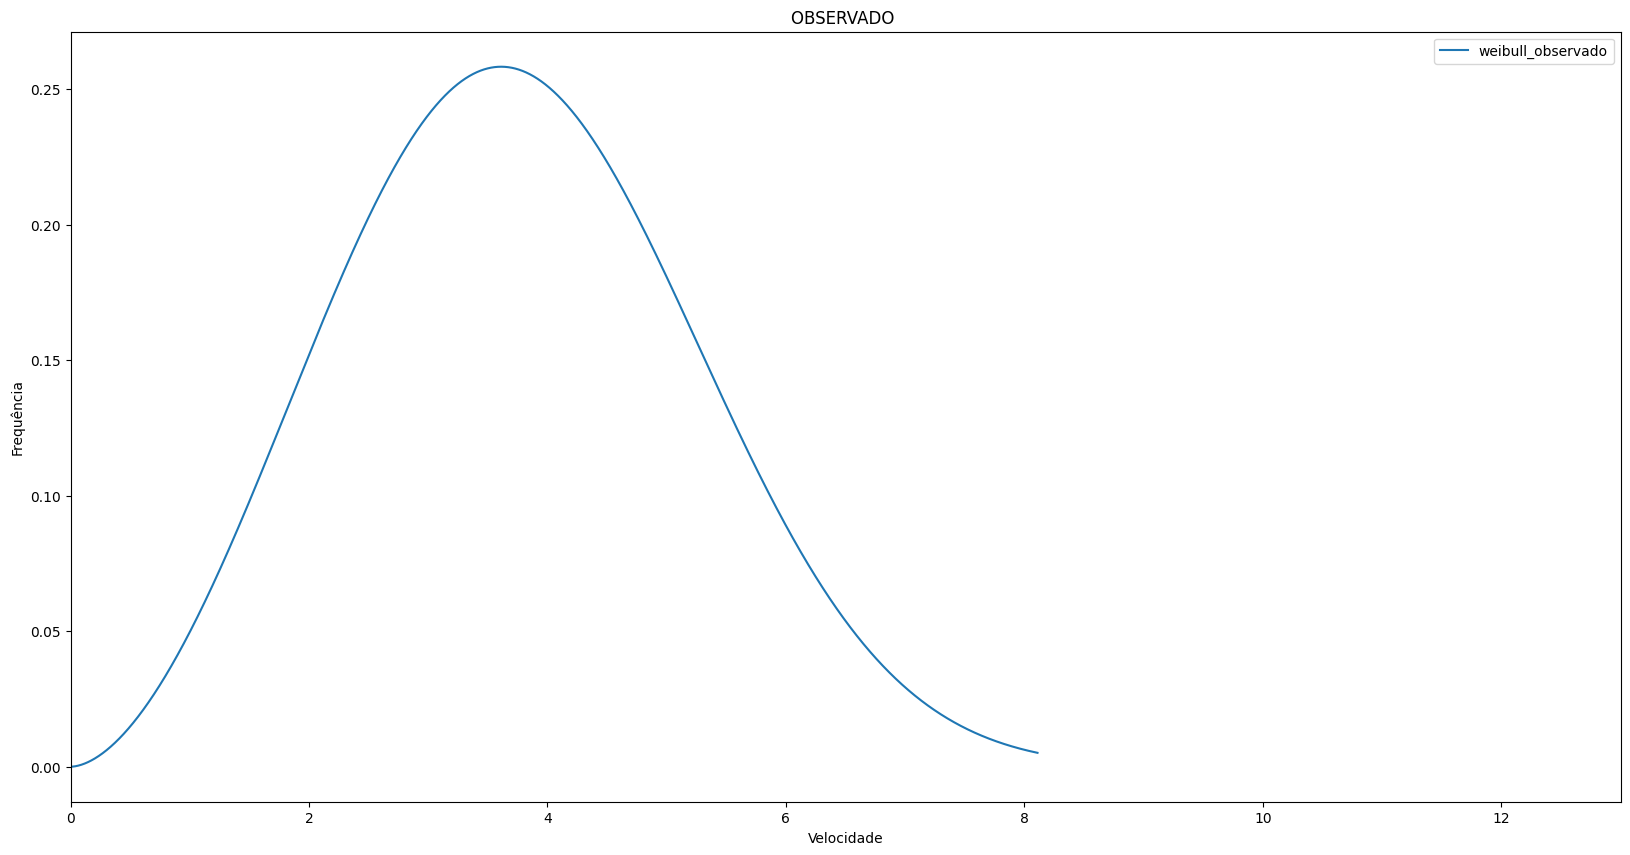

In [ ]:
# vv = velocidade média do vento (m/s)
# k = fator de forma
# c = fator de escala
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns

vv_obs = df['OBS_10']

k = (vv_obs.std()/vv_obs.mean())**-1.086
c = vv_obs.mean()/math.gamma(1+1/k)

x = np.linspace(0,(max(vv_obs)),5880)

f, ax = plt.subplots(1, 1, figsize = (20, 10))

#histog = plt.hist(vet)


weibull = [(k / c) * (vv_obs / c)**(k-1) * np.exp(-(vv_obs/c)**k) for vv_obs in x]



#count, bins, ignored = plt.bar(vet,weibull)
#plt.plot(plt.hist(df['WS_100m']))
plt.plot(x,weibull,label='weibull_observado')
ax.set_xlabel("Velocidade")
ax.set_ylabel("Frequência")
ax.set_title("OBSERVADO ")
plt.legend()
plt.xlim(0,13)
plt.show()


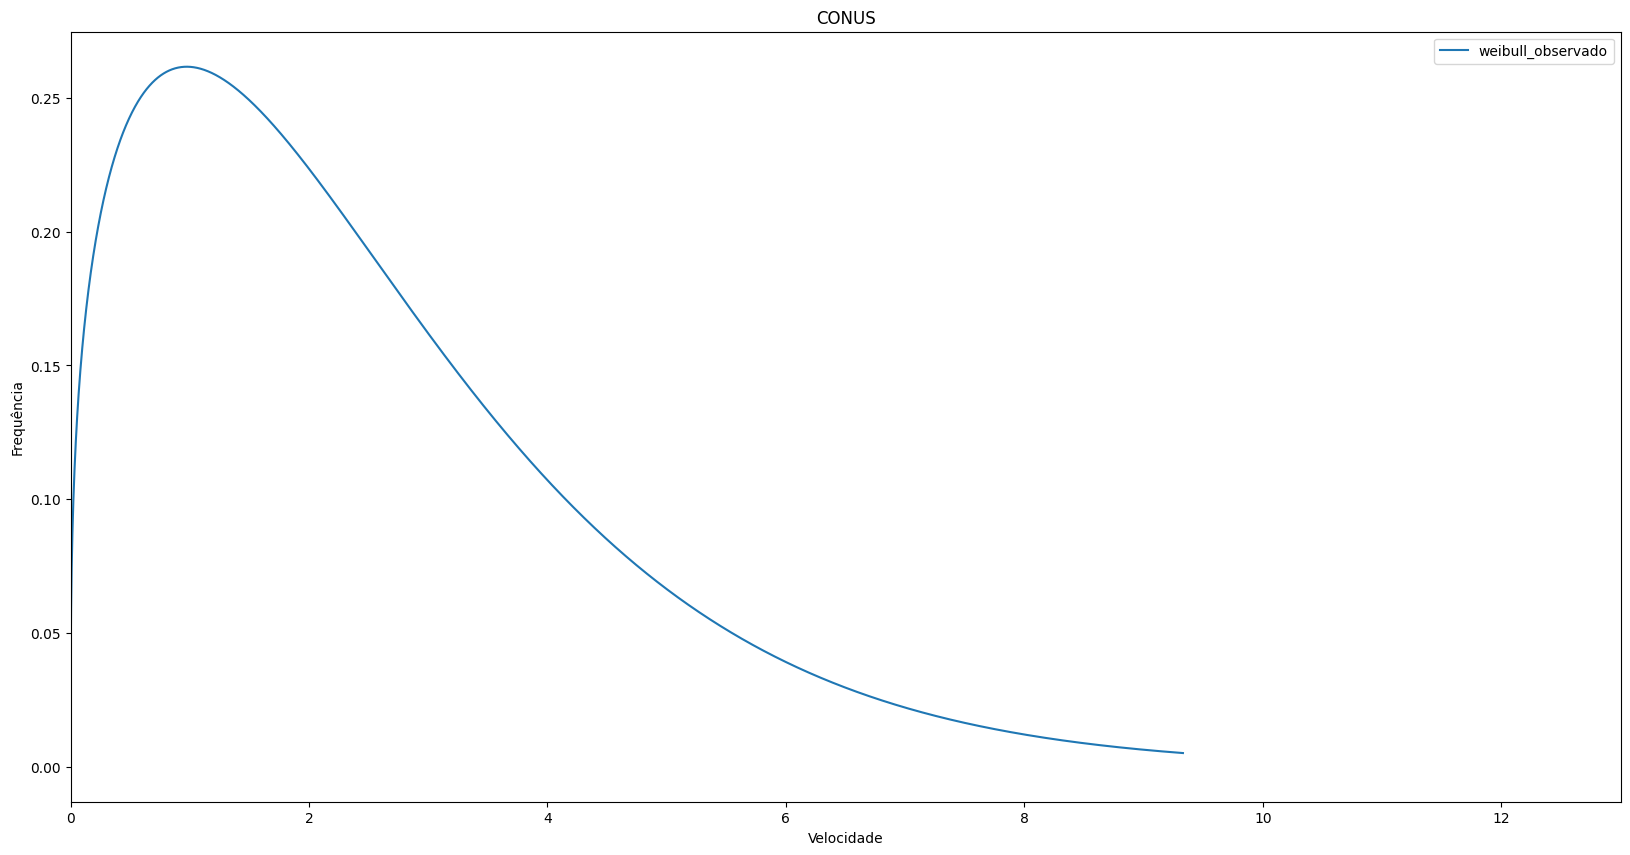

In [ ]:
# vv = velocidade média do vento (m/s)
# k = fator de forma
# c = fator de escala
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns

vv_obs = df['WRF_CONUS']

k = (vv_obs.std()/vv_obs.mean())**-1.086
c = vv_obs.mean()/math.gamma(1+1/k)

x = np.linspace(0,(max(vv_obs)),5880)

f, ax = plt.subplots(1, 1, figsize = (20, 10))

#histog = plt.hist(vet)


weibull = [(k / c) * (vv_obs / c)**(k-1) * np.exp(-(vv_obs/c)**k) for vv_obs in x]

#count, bins, ignored = plt.bar(vet,weibull)
#plt.plot(plt.hist(df['WS_100m']))
plt.plot(x,weibull,label='weibull_observado')
ax.set_xlabel("Velocidade")
ax.set_ylabel("Frequência")
ax.set_title("CONUS")
plt.legend()
plt.xlim(0,13)
plt.show()


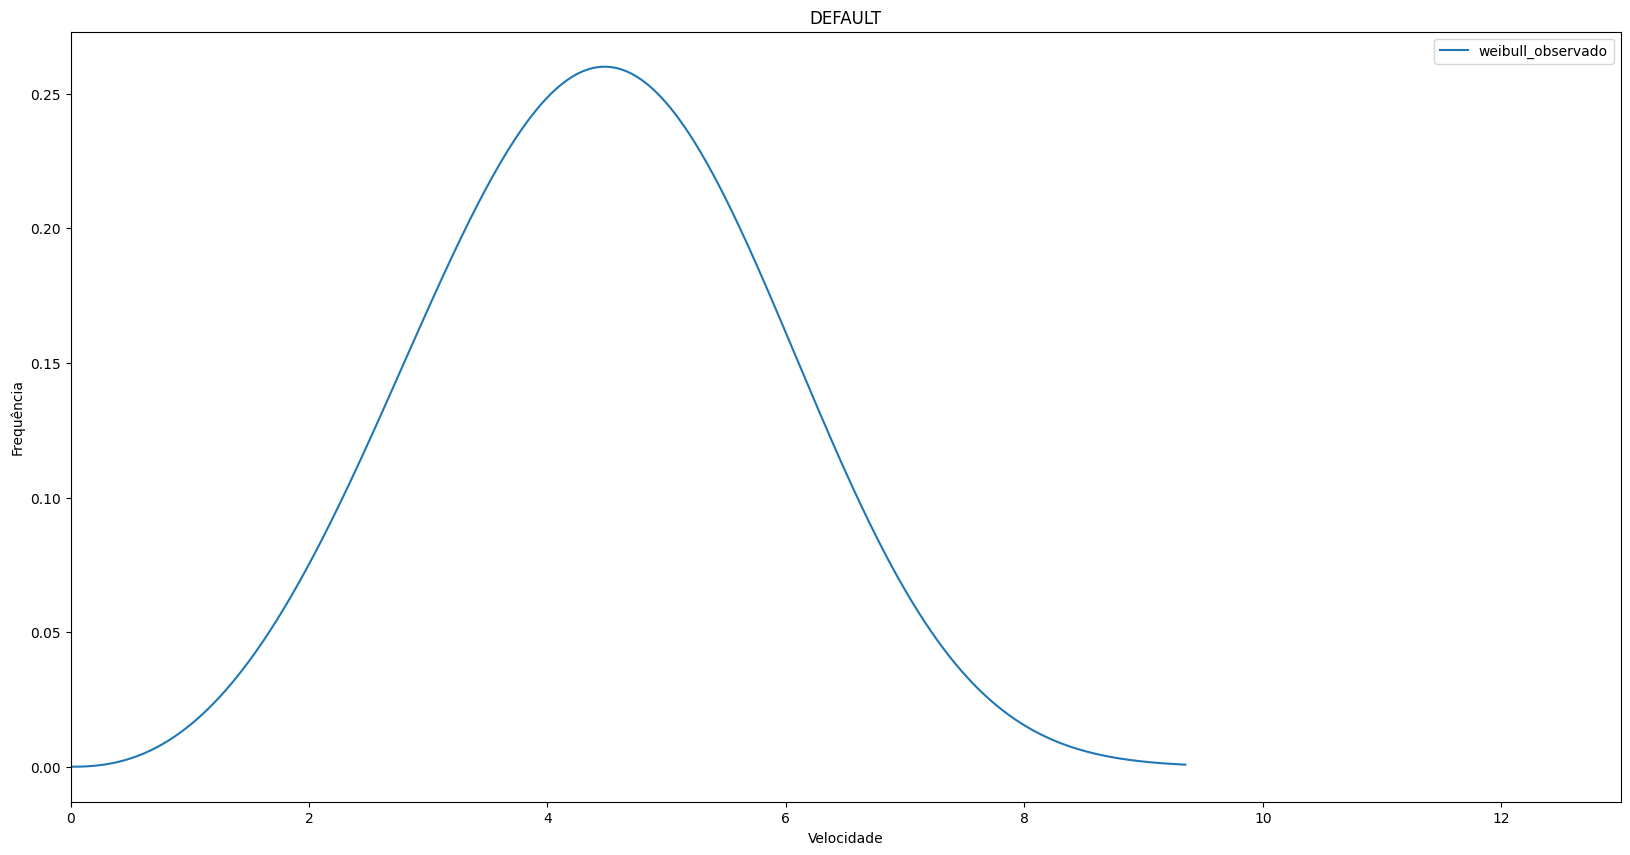

In [ ]:
# vv = velocidade média do vento (m/s)
# k = fator de forma
# c = fator de escala
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns

vv_obs = df['WRF_DEFAULT']

k = (vv_obs.std()/vv_obs.mean())**-1.086
c = vv_obs.mean()/math.gamma(1+1/k)

x = np.linspace(0,(max(vv_obs)),5880)

f, ax = plt.subplots(1, 1, figsize = (20, 10))

#histog = plt.hist(vet)


weibull = [(k / c) * (vv_obs / c)**(k-1) * np.exp(-(vv_obs/c)**k) for vv_obs in x]

#count, bins, ignored = plt.bar(vet,weibull)
#plt.plot(plt.hist(df['WS_100m']))
plt.plot(x,weibull,label='weibull_observado')
ax.set_xlabel("Velocidade")
ax.set_ylabel("Frequência")
ax.set_title("DEFAULT")
plt.legend()
plt.xlim(0,13)
plt.show()


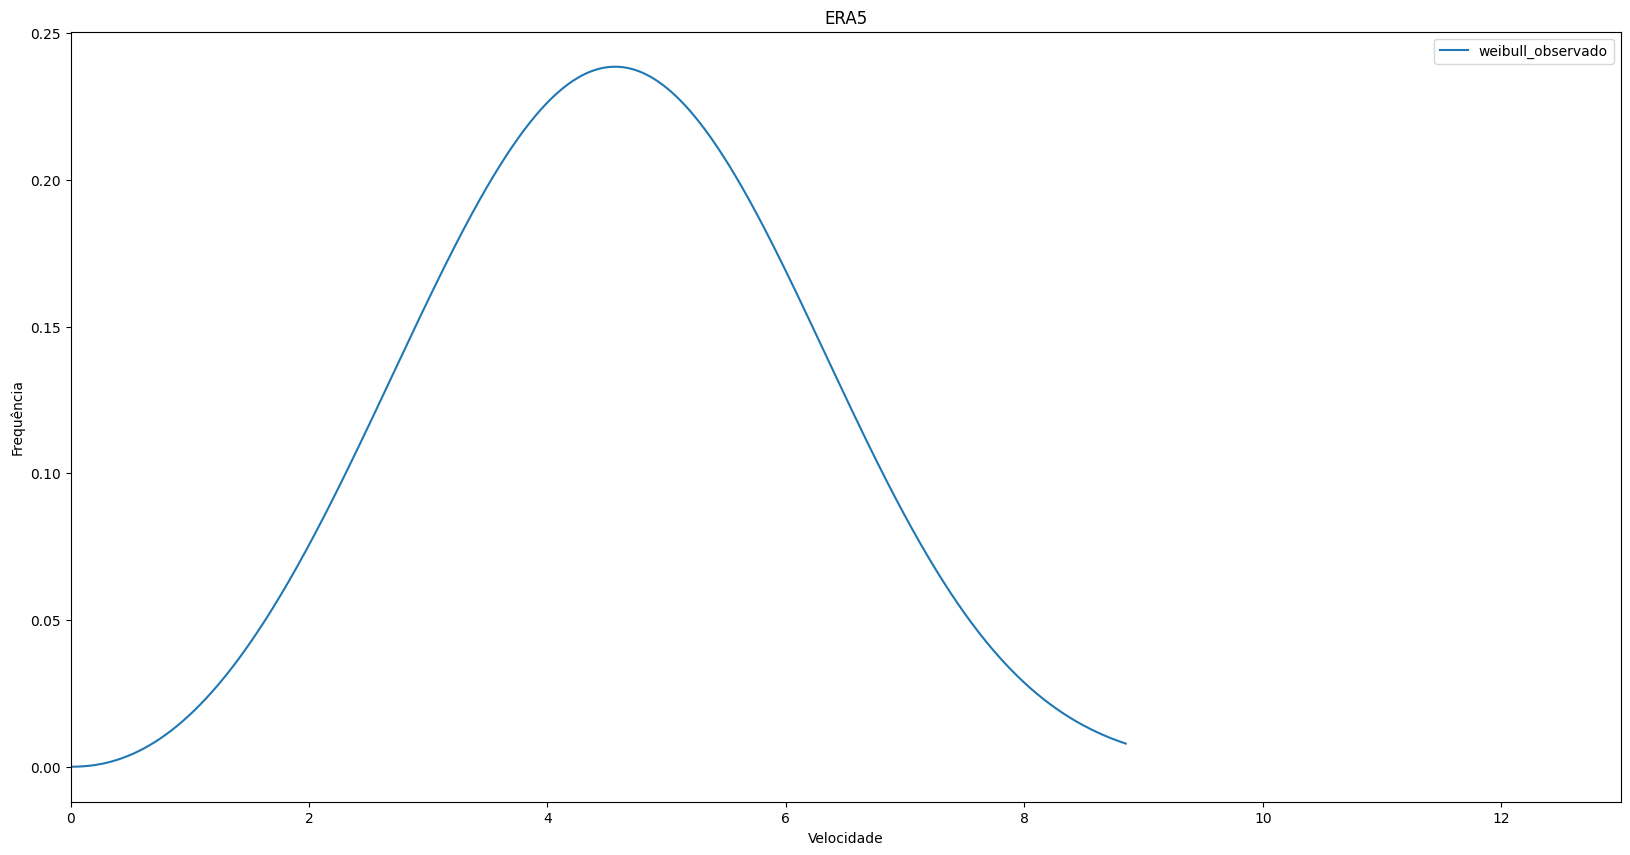

In [ ]:
# vv = velocidade média do vento (m/s)
# k = fator de forma
# c = fator de escala
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns

vv_obs = df['WRF_ERA5']

k = (vv_obs.std()/vv_obs.mean())**-1.086
c = vv_obs.mean()/math.gamma(1+1/k)

x = np.linspace(0,(max(vv_obs)),5880)

f, ax = plt.subplots(1, 1, figsize = (20, 10))

#histog = plt.hist(vet)


weibull = [(k / c) * (vv_obs / c)**(k-1) * np.exp(-(vv_obs/c)**k) for vv_obs in x]

#count, bins, ignored = plt.bar(vet,weibull)
#plt.plot(plt.hist(df['WS_100m']))
plt.plot(x,weibull,label='weibull_observado')
ax.set_xlabel("Velocidade")
ax.set_ylabel("Frequência")
ax.set_title("ERA5")
plt.legend()
plt.xlim(0,13)
plt.show()
